01. Import libraries and data 

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#Set path
path = r'/Users/corinagugulus/Instacart Analysis'

In [3]:
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'customers_ords_prods_merged.pkl'))

In [4]:
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,first name,surname,gender,state,age,date_joined,number_of_dependants,marital_status,income,True
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


2. Visualizations

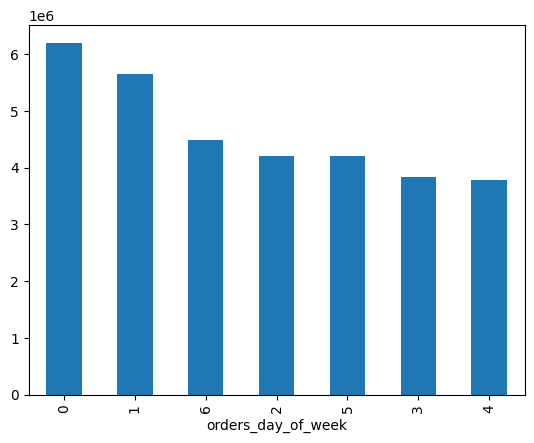

In [5]:
#Create a bar chart on the current database
bar = df ['orders_day_of_week']. value_counts().plot.bar()

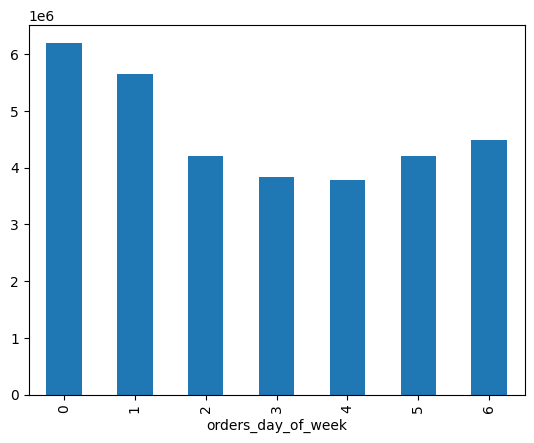

In [6]:
#Create a bar chart on the current database with the sort_index function
bar = df['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [7]:
#Export the bar chart
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_day_of_week.png'))

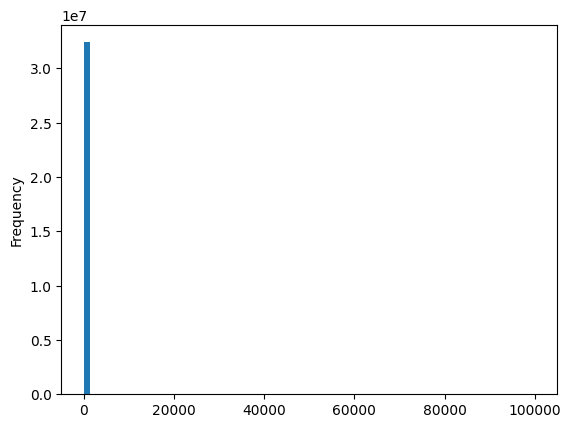

In [15]:
#Create a histogram

histogram = df['prices'].plot.hist(bins = 70)

In [30]:
#Export the histogram
histogram.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'histogram_70_level_of_granularity.png'))

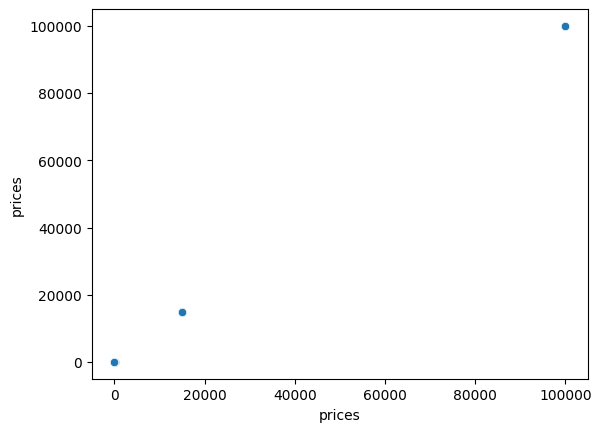

In [16]:
#Create a scatterplot -- when run this in another book while following the excercise 4.9. course text it looked differently because of the database used(the unmerged one)
scatterplot = sns.scatterplot(x = 'prices', y = 'prices', data = df)


In [17]:
#Export the scatterplot
scatterplot.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot.png'))

In [18]:
#Create a line chart using a sample subset
np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7 

In [19]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [20]:
#Store 70% of the sample in the dataframe big
big = df[dev]

In [21]:
#Store 30% of the sample in the dataframe small
small = df[~dev]

In [22]:
len(df)

32404859

In [23]:
len(big) + len(small)

32404859

In [24]:
#Extracting the neccessary columns -- 'prices', 'orders_day_of_week'
df_2 = small[['prices', 'orders_day_of_week']]

In [25]:
df_2

,prices,orders_day_of_week
0,9.0,2
2,9.0,3
3,9.0,4
6,9.0,1
10,12.5,2
...,...,...
32404841,10.7,2
32404842,10.7,6
32404843,10.7,0
32404849,10.7,1


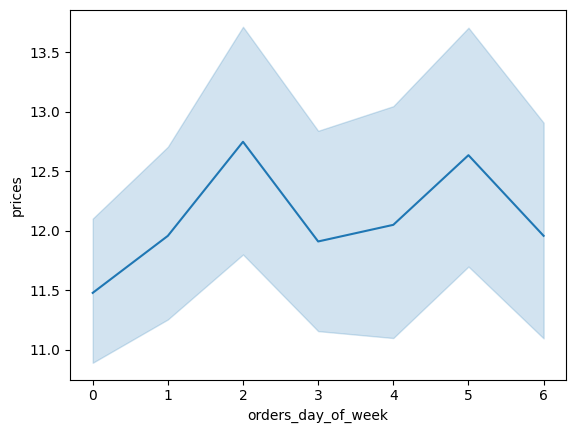

In [46]:
#Create a line chart of the small subset dataframe
line = sns.lineplot(data = df_2, x = 'orders_day_of_week', y = 'prices')

In [27]:
#Export the line chart above
line.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'line_small_sample2.png'))

03. Providing the Instacart senior stakeholders with descriptive findings about sales

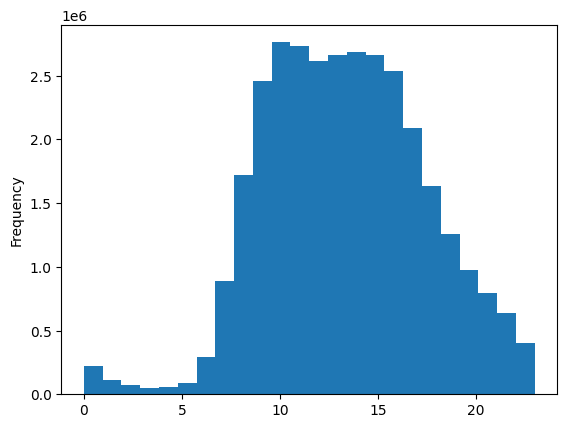

In [28]:
# Create a histogram of the “order_hour_of_day” column
histogram2 = df['order_hour_of_day'].plot.hist(bins = 24)

In [29]:
#The histogram shows the daily frequency of orders from 10 am to 5 pm (10 to 17)

In [30]:
#Export the histogram above
histogram2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'histogram2.png'))

04. The distribution of orders among customers in terms of loyalty. 

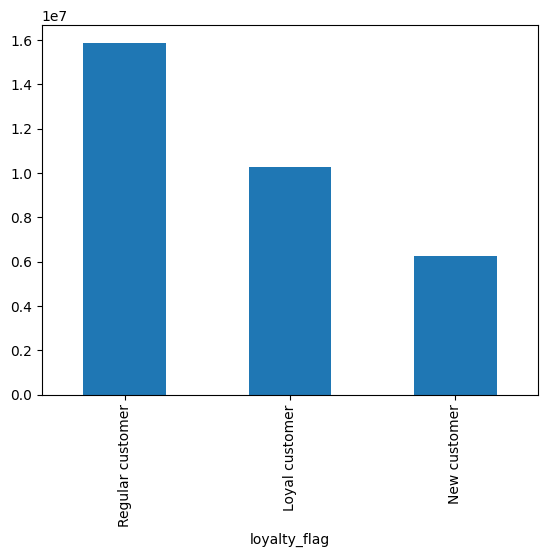

In [31]:
# a bar chart of value counts for customer loyalty 

bar_chart = df['loyalty_flag'].value_counts().plot.bar()

In [33]:
# export the bar chart

bar_chart.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','loyalty_bar.png'))

05.Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day

In [34]:
#creating a small data frame with the columns needed & using the "small" database 

df_diff_in_expenditure = small[['prices', 'order_hour_of_day'] ]

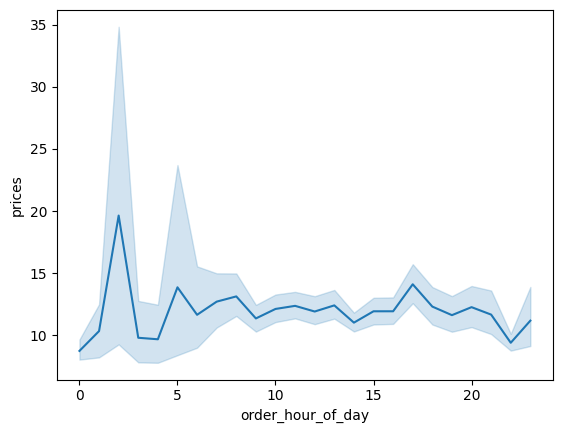

In [35]:
#creating a line chart using this smaller representatitve subset

line_hour = sns.lineplot(data = df_diff_in_expenditure, x = 'order_hour_of_day',y = 'prices')

In [36]:
# export the line chart

line_hour.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hour_of_line.png'))

06.Exploratory analysis of customer demographics 

In [38]:
#creating a small dataframe
df_customers_dem = small[['age', 'number_of_dependants']]

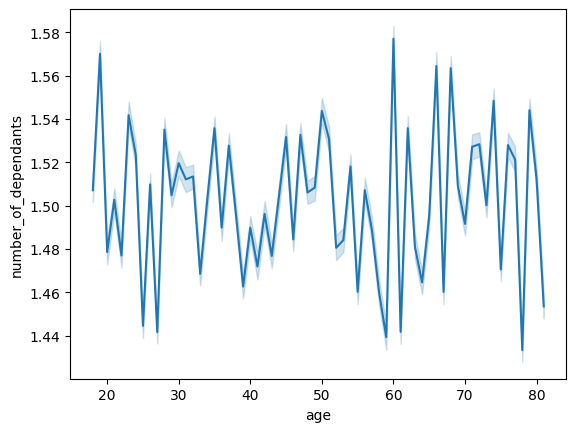

In [40]:
# running the line chart
line_age = sns.lineplot (data = df_customers_dem, x = 'age', y = 'number_of_dependants')

In [41]:
#export the line plot
line_age.figure.savefig(os.path.join (path, '04 Analysis', 'Visualizations','age_dependants_line.png'))

In [42]:
#There is no apparent relationship bw customer's age and dependants

07.Connection between age and spending power (income)

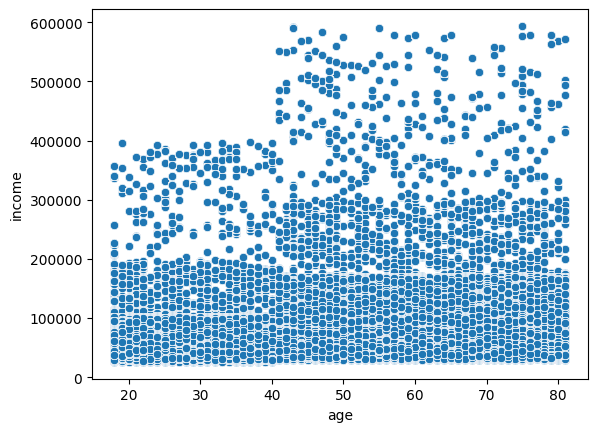

In [43]:
# create a scatterplot of age and income

scatter_income = sns.scatterplot(data = df, x= 'age', y = 'income')

In [44]:
#export the scatter plot
scatter_income.figure.savefig(os.path.join (path, '04 Analysis', 'Visualizations','income_scatterplot.png'))

In [45]:
#The scatterplot shows that the vast majority of customers' income is below 200000 and that a wide dispersion of income increases around 40 y.o.